In [1]:
import pandas as pd
data = pd.read_excel('/content/final_reviews.xlsx') #Loading the dataset to environment
data

,Reviews
0,Pros:- Great battery backup. With moderate usa...
1,It's works just as they advertised it .THE DIS...
2,I am very much happy with this phone .It's my ...
3,Bought this phone with a bit of trepidation be...
4,if you re looking for overall good phone then ...
...,...
1911,Writing review after 2 months of usage. I have...
1912,No return policyDrain plug is also blocked and...
1913,I ordered this cooler in April and after two m...
1914,The media could not be loaded.\n ...


In [2]:
data.info() # Getting information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1916 entries, 0 to 1915
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Reviews  1901 non-null   object
dtypes: object(1)
memory usage: 15.1+ KB


**The dataset contains 1916 from first command but from second command it shows 1901 rows. So, the dataset contains null values**

In [3]:
data.isna().sum() # Finding null values in the dataset

,0
Reviews,15


In [4]:
data = data.dropna() # Removing null values from dataset

In [5]:
data.isna().sum()

,0
Reviews,0


In [6]:
data[data.duplicated()] # Checking for duplicate values in the dataset

,Reviews
32,Pros:- Great battery backup. With moderate usa...
370,"I purchased on 20th August, not connecting pro..."
371,Boat airdopes 141 is the worse product. It alw...
372,Bought this in 2023 within 6 months left side ...
373,It doesn't work with Macbook air M1 at all. Fo...
...,...
1794,The media could not be loaded.
1801,Worst
1821,Good
1825,Ok


In [7]:
data = data.drop_duplicates() # Droping duplicated from dataset
data

,Reviews
0,Pros:- Great battery backup. With moderate usa...
1,It's works just as they advertised it .THE DIS...
2,I am very much happy with this phone .It's my ...
3,Bought this phone with a bit of trepidation be...
4,if you re looking for overall good phone then ...
...,...
1911,Writing review after 2 months of usage. I have...
1912,No return policyDrain plug is also blocked and...
1913,I ordered this cooler in April and after two m...
1914,The media could not be loaded.\n ...


In [8]:
data = data.reset_index(drop=True) # Resetting index values
data

,Reviews
0,Pros:- Great battery backup. With moderate usa...
1,It's works just as they advertised it .THE DIS...
2,I am very much happy with this phone .It's my ...
3,Bought this phone with a bit of trepidation be...
4,if you re looking for overall good phone then ...
...,...
1809,Writing review after 2 months of usage. I have...
1810,No return policyDrain plug is also blocked and...
1811,I ordered this cooler in April and after two m...
1812,The media could not be loaded.\n ...


In [9]:
import re

def clean_text(text):
  # Remove HTML tags
  text = re.sub('<[^<]+?>', '', text)

  # Remove URLs
  text = re.sub(r'http\S+', '', text)

  # Remove punctuation
  text = re.sub(r'[^\w\s]', '', text)

  # Remove numbers
  text = re.sub(r'\d+', '', text)

  text = re.sub(r'[^\x00-\x7F]+', '', text) # Remove non-English characters

  return text

data['Reviews'] = data['Reviews'].apply(clean_text) # Applying the clean_text function to the 'Reviews' column
data

,Reviews
0,Pros Great battery backup With moderate usage ...
1,Its works just as they advertised it THE DISPL...
2,I am very much happy with this phone Its my go...
3,Bought this phone with a bit of trepidation be...
4,if you re looking for overall good phone then ...
...,...
1809,Writing review after months of usage I have i...
1810,No return policyDrain plug is also blocked and...
1811,I ordered this cooler in April and after two m...
1812,The media could not be loaded\n ...


In [10]:
for i in range(len(data)):
  data['Reviews'][i] = data['Reviews'][i].casefold() # Converting all text to lowercases text
data

,Reviews
0,pros great battery backup with moderate usage ...
1,its works just as they advertised it the displ...
2,i am very much happy with this phone its my go...
3,bought this phone with a bit of trepidation be...
4,if you re looking for overall good phone then ...
...,...
1809,writing review after months of usage i have i...
1810,no return policydrain plug is also blocked and...
1811,i ordered this cooler in april and after two m...
1812,the media could not be loaded\n ...


In [11]:
data['Reviews'][0] # Checking any upper case letters in a row manually

'pros great battery backup with moderate usage on wifi can easily last upto  days also there is very less battery drain when idle especially overnight definitely one of the best with  mah one of my primary reasons to buy this phone camera quality at this price is way above average finally punch hole display from samsung for m series and at this price point one ui software is very stable and comes with plenty of customisations no issues in performance with multitasking involving streaming videos music social media apps browser surfing etc cant say about gaming as i am not a gamer up to  gens of software updates which hardly any company provides even with flagship phones but need to keep in mind that the product page on samsungs website clearly states that this is not a promise but just their current plans and it can be changed anytime at their own discretioncons bulky which is expected considering the massive battery holding with one hand for extended period of time causes discomfort sp

In [12]:
data['Reviews'] = data['Reviews'].str.split() # Separating each word from every review and append them to list
data['Reviews'].sample()

,Reviews
711,"[the, label, reads, gb, with, all, the, oversi..."


In [13]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') # Downloading stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
stop_words = set(stopwords.words('english')) # Setting stop words

In [15]:
def remove_stopwords(review):
  filtered_review = [word for word in review if word not in stop_words] # Removing stop words
  return filtered_review

In [16]:
data['Reviews'] = data['Reviews'].apply(remove_stopwords) # Applying the remove_stopwords function to the 'Reviews' column
data

,Reviews
0,"[pros, great, battery, backup, moderate, usage..."
1,"[works, advertised, display, really, good, sam..."
2,"[much, happy, phone, good, decision, go, gcame..."
3,"[bought, phone, bit, trepidation, samsung, pho..."
4,"[looking, overall, good, phone, one, got, k, b..."
...,...
1809,"[writing, review, months, usage, installed, ou..."
1810,"[return, policydrain, plug, also, blocked, pro..."
1811,"[ordered, cooler, april, two, months, swing, s..."
1812,"[media, could, loaded, product, seems, good, m..."


In [17]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet') # Downloading wordnet for performming lematization

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
lemmatizer = WordNetLemmatizer() # Setting lemmatizer

In [19]:
def lemmatize_words(review):
  lemmatized_review = [lemmatizer.lemmatize(word) for word in review] # Lemmatizing words
  return lemmatized_review

In [20]:
data['Reviews'] = data['Reviews'].apply(lemmatize_words) # Applying the lemmatize_words function to the 'Reviews' column
data.head()

,Reviews
0,"[pro, great, battery, backup, moderate, usage,..."
1,"[work, advertised, display, really, good, sams..."
2,"[much, happy, phone, good, decision, go, gcame..."
3,"[bought, phone, bit, trepidation, samsung, pho..."
4,"[looking, overall, good, phone, one, got, k, b..."


In [21]:
data['Length'] = data['Reviews'].apply(len) # Finding the length of reviews
data

,Reviews,Length
0,"[pro, great, battery, backup, moderate, usage,...",151
1,"[work, advertised, display, really, good, sams...",170
2,"[much, happy, phone, good, decision, go, gcame...",21
3,"[bought, phone, bit, trepidation, samsung, pho...",293
4,"[looking, overall, good, phone, one, got, k, b...",60
...,...,...
1809,"[writing, review, month, usage, installed, out...",183
1810,"[return, policydrain, plug, also, blocked, pro...",12
1811,"[ordered, cooler, april, two, month, swing, sy...",36
1812,"[medium, could, loaded, product, seems, good, ...",88


In [22]:
import plotly.express as px # Plotting histogram for finding distribution of length reviews
fig = px.histogram(data, x='Length', nbins=100,template='plotly_dark',text_auto=True)
fig.update_traces(marker_line_color='black',marker_line_width=1.2)
fig.update_layout(title='Histogram of Review Lengths',
                  title_x=0.5)
fig.show()

## **Key Observations:**

**Skewness:** The distribution is right-skewed, meaning there are a few very long reviews (tail on the right) that pull the average length higher than the median.

**Peak:** The most frequent review length is between 0 and 99 characters. This suggests that a significant number of reviews are relatively short.

**Frequency:** The frequency of reviews decreases as the length increases. This indicates that longer reviews are less common.

**Outliers:** While not extremely prominent, there are a few outliers on the right side of the histogram, representing reviews with lengths significantly longer than the majority.

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

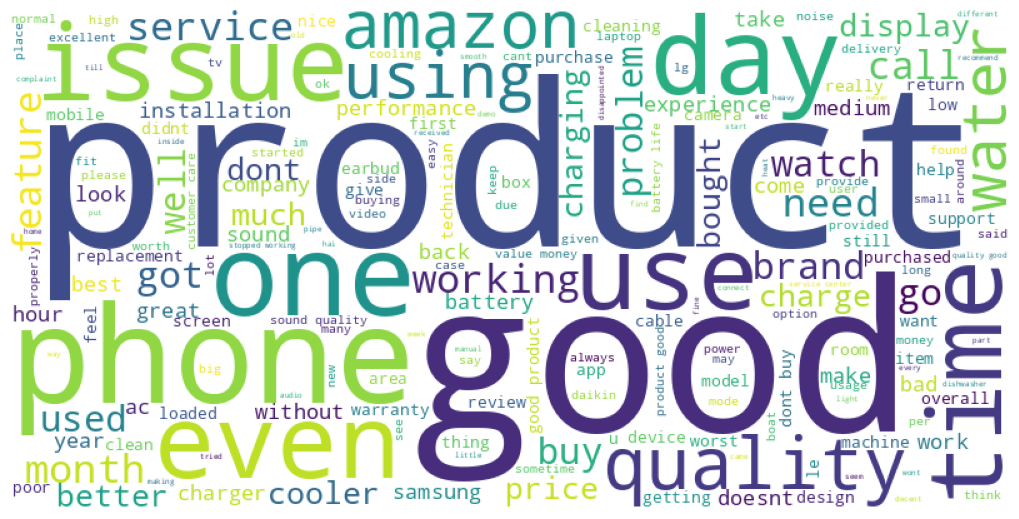

In [24]:
# Combine all reviews into a single string
all_reviews = ' '.join([' '.join(review) for review in data['Reviews']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# **Key Observations:**

* Words related to products and services, such as "phone," "product," "quality," "warranty," and "delivery," are prominently displayed, indicating that these are central concerns for customers.

* Terms like "experience," "service," "issue," and "problem" suggest that customer satisfaction and support are important aspects of the product or service.

* Words like "price," "value," and "money" highlight the importance of affordability and perceived value.

* Terms such as "battery," "charging," "working," and "performance" indicate that customers are concerned with the product's functionality and reliability.

* The presence of "Amazon" and "Samsung" suggests that brand perception and reputation play a role in customer satisfaction.

In [25]:
from collections import Counter
import plotly.express as px

# Flatten the list of lists into a single list of words
all_words = [word for review in data['Reviews'] for word in review]

# Count the frequency of each word
word_counts = Counter(all_words)

# Convert to DataFrame for plotting
word_counts_df = pd.DataFrame({'Word': list(word_counts.keys()), 'Frequency': list(word_counts.values())})

# Sort by frequency in descending order
word_counts_df = word_counts_df.sort_values('Frequency', ascending=False)

# Create the bar plot using Plotly Express
fig = px.bar(word_counts_df.head(20), x='Word', y='Frequency',
             title='Top 20 Most Frequent Words', template='plotly_dark',text_auto='True')

fig.update_traces(marker_line_color='black', marker_line_width=1.2)
fig.update_layout(title_x=0.5, xaxis_tickfont_size=10)

fig.show()

**Key Observations:**

* The words "product," "good," and "quality" appear with significantly higher frequencies than the others, suggesting that they are central themes or topics in the dataset.

In [26]:
def lexical_diversity(text):
    unique_words = set(text)  # Get unique words
    if len(text) == 0:  # Handle empty text case
        return 0
    return len(unique_words) / len(text)

# Apply the function to the dataset
data['lexical_analyzer'] = data['Reviews'].apply(lexical_diversity)
data.head()

,Reviews,Length,lexical_analyzer
0,"[pro, great, battery, backup, moderate, usage,...",151,0.827815
1,"[work, advertised, display, really, good, sams...",170,0.776471
2,"[much, happy, phone, good, decision, go, gcame...",21,0.904762
3,"[bought, phone, bit, trepidation, samsung, pho...",293,0.761092
4,"[looking, overall, good, phone, one, got, k, b...",60,0.900000


In [27]:
i = data[data['lexical_analyzer'] == 0].index
data = data.drop(i) # Removing columns with no text present in it
data[data['lexical_analyzer']==0]

,Reviews,Length,lexical_analyzer


In [28]:
fig = px.histogram(data,                    # Finding distribution uniqueness of words
                   x='lexical_analyzer',
                   nbins=100,
                   template='plotly_dark')

fig.update_traces(marker_line_width=1.2)

fig.update_layout(title='Histogram of Lexical Diversity',
                  title_x=0.5)

fig.show()

# **Key Observations:**

**Skewness:** The distribution is right-skewed, meaning there are a few texts with very high lexical diversity (tail on the right) that pull the average diversity higher than the median.

**Peak:** The most frequent lexical diversity range is between 0.8 and 0.9. This suggests that a significant number of texts have a relatively high level of lexical diversity.

**Frequency:** The frequency of texts decreases as the lexical diversity increases. This indicates that texts with very high or very low lexical diversity are less common.

**Outliers:** There are a few outliers on the right side of the histogram, representing texts with exceptionally high lexical diversity.

In [32]:
correlation = data['Length'].corr(data['lexical_analyzer']) # Finding correlataion
print(f"Correlation between Length and Lexical Diversity: {correlation}")

Correlation between Length and Lexical Diversity: -0.6309434587262195


## **Key Observations**
* There appears to be a negative correlation between length and lexical diversity. This suggests that, in general, longer texts tend to have lower lexical diversity.

In [33]:
# Group reviews by length and calculate the average word count for each group
length_word_counts = data.groupby('Length')['lexical_analyzer'].mean()

# Create a scatter plot to visualize the distribution
fig = px.scatter(x=length_word_counts.index, y=length_word_counts.values,
                 labels={'x': 'Review Length', 'y': 'Average Word Frequency'},
                 title='Distribution of Word Counts in Reviews of Different Lengths',
                 template='plotly_dark')

fig.update_traces(marker_line_color='black',
                  marker_line_width=1.2)

fig.update_layout(title_x=0.5)

fig.show()

## **Key Observations:**

**Correlation:** There appears to be a negative correlation between average word frequency and review length. This suggests that, in general, longer reviews tend to have lower average word frequencies.

**Clustering:** The data points seem to cluster in certain areas of the plot. There might be a cluster of points in the lower right corner, representing longer reviews with lower average word frequencies.

**Outliers:** A few outliers can be observed, such as the points with very high average word frequency and relatively short lengths. These might represent reviews with very unique vocabulary usage or specialized topics.

**Scatter:** The data points are not perfectly aligned, indicating that there is some variation in the relationship between average word frequency and review length. Other factors besides length may influence word frequency.

In [34]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [35]:
def pos_tag_text(text):
  tokens = nltk.word_tokenize(text)
  return nltk.pos_tag(tokens)

In [36]:
data['Reviews_Joined'] = data['Reviews'].apply(lambda x: ' '.join(x))
# Apply POS tagging to the 'Reviews_Joined' column
data['pos_tags'] = data['Reviews_Joined'].apply(pos_tag_text)

In [37]:
# Count the frequency of different POS tags
pos_tag_counts = {}
for _, row in data.iterrows():
  for word, tag in row['pos_tags']:
    if tag not in pos_tag_counts:
      pos_tag_counts[tag] = 0
    pos_tag_counts[tag] += 1

In [38]:
# Convert to DataFrame for plotting
pos_tag_counts_df = pd.DataFrame({'POS Tag': list(pos_tag_counts.keys()), 'Frequency': list(pos_tag_counts.values())})

# Sort by frequency in descending order
pos_tag_counts_df = pos_tag_counts_df.sort_values('Frequency', ascending=False)

In [39]:
# Create the bar plot using Plotly Express
fig = px.bar(pos_tag_counts_df, x='POS Tag', y='Frequency',
             title='Distribution of Parts of Speech', template='plotly_dark',text_auto=True)

fig.update_traces(marker_line_color='black', marker_line_width=1.2)
fig.update_layout(title_x=0.5, xaxis_tickfont_size=10)

fig.show()

## **Key Observations:**

**Dominant Parts of Speech :** The POS tags "NN" (nouns) and "VB" (verbs) appear with significantly higher frequencies than the others, suggesting that nouns and verbs are the most common word types in the dataset.

**Frequency Distribution:** The frequency of parts of speech decreases rapidly, indicating that a small number of POS tags account for a large portion of the total words.

**Adjectives and Adverbs:** Adjectives (JJ) and adverbs (RB) are also relatively frequent, suggesting that descriptive language is common in the dataset.

**Function Words:** Function words such as prepositions (IN) and conjunctions (CC) are also represented, but with lower frequencies.

**Less Frequent Tags:** Many POS tags, such as "MD" (modal verbs), "PRP" (personal pronouns), and "WP" (wh-pronouns), have very low frequencies.

In [40]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
# Create a CountVectorizer to convert the reviews into a document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(data['Reviews_Joined'])

In [42]:
# Define the number of topics
num_topics = 10

# Create an LDA model
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit the LDA model to the document-term matrix
lda_model.fit(dtm)

LatentDirichletAllocation(random_state=42)

In [43]:
# Get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words_list = []
    for topic_idx, topic in enumerate(model.components_):
        top_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words_list.append(top_words)
    return top_words_list

In [44]:
feature_names = vectorizer.get_feature_names_out()
n_top_words = 10  # Adjust the number of top words per topic
top_words_per_topic = get_top_words(lda_model, feature_names, n_top_words)

In [45]:
for i, topic_words in enumerate(top_words_per_topic):
    print(f"Topic {i + 1}:")
    print(", ".join(topic_words))

Topic 1:
ac, product, daikin, good, cooling, air, day, service, installation, water
Topic 2:
watch, feature, user, smartwatch, design, im, fit, quality, fireboltt, boat
Topic 3:
good, use, cleaning, time, battery, hour, robot, like, charging, using
Topic 4:
iron, lg, microwave, result, good, bajaj, le, use, heating, performance
Topic 5:
product, service, month, working, amazon, customer, issue, day, buy, time
Topic 6:
good, quality, product, sound, money, value, bud, price, tv, earbuds
Topic 7:
product, like, cable, mixer, hai, brand, good, dont, buy, price
Topic 8:
product, use, utensil, power, really, cooking, hour, like, prestige, kitchen
Topic 9:
water, cooler, good, drain, pipe, ice, pad, pump, need, tank
Topic 10:
phone, good, battery, charging, samsung, charger, camera, quality, display, mobile


## **Key Observations:**

**Consumer Electronics:** Topics 1, 2, 4, 6, 7, 10 primarily focus on consumer electronics, such as air conditioners, watches, irons, televisions, earbuds, and phones.

**Home Appliances:** Topics 3, 8, and 9 revolve around home appliances like robots, kitchen utensils, and water coolers.

**Product Quality and Performance:** Many topics, including 1, 3, 4, 6, 7, 8, and 10, emphasize product quality, performance, and functionality.

**Customer Experience:** Topics 5 and 10 touch on customer service, issues, and overall experience.

**Value and Price:** Topics 6 and 7 highlight the importance of value, price, and affordability.

**Brand Mentions:** Brands like Daikin, Fireboltt, Boat, LG, Bajaj, Prestige, and Samsung are frequently mentioned, indicating their prominence in the market.

**Product Features:** Specific features like cooling, design, battery life, charging, sound quality, and cooking performance are often discussed.

**Customer Satisfaction:** Terms like "good," "like," and "quality" suggest that customers are generally satisfied with the products.

**Issues and Problems:** While "good" and "like" are common, terms like "issue," "problem," and "dont" indicate that there are areas where customers may encounter difficulties.

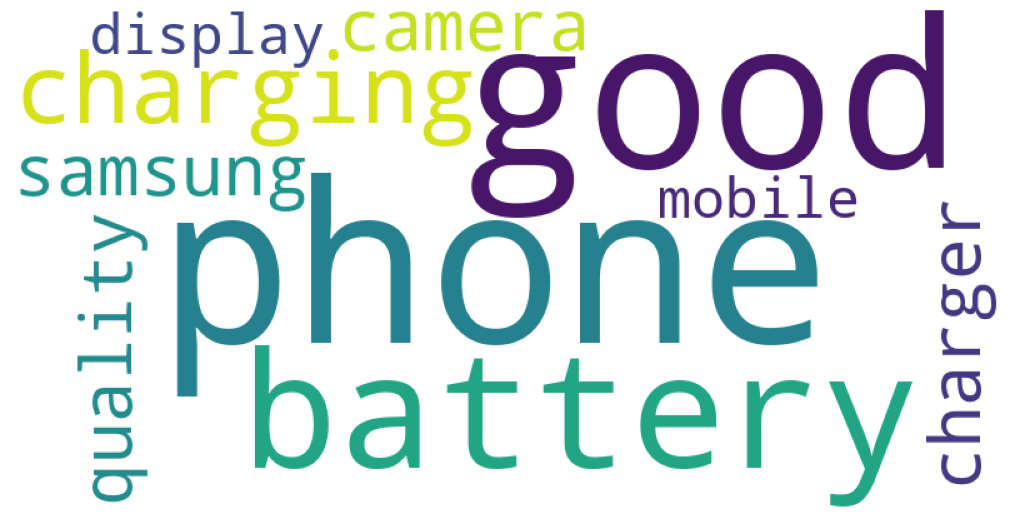

In [46]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(topic_words))
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## **Key Themes:**

**Mobile Phones:** The word "phone" is the most prominent, indicating that the topic is primarily focused on mobile phones.

**Product Quality and Features:** Terms like "good," "quality," "camera," "display," and "battery" highlight the importance of these factors in customer satisfaction.

**Charging and Battery:** Words related to charging and battery life suggest that these are significant concerns for users.

**Brand Mention:** "Samsung" is prominently displayed, suggesting that it is a popular brand among customers.

**Positive Sentiment:** The overall tone of the word cloud is positive, with words like "good" and "quality" dominating.

In [47]:
# Create a list of positive and negative words
positive_words = ['good', 'great', 'love', 'excellent', 'amazing', 'fantastic', 'wonderful']
negative_words = ['bad', 'terrible', 'hate', 'awful', 'poor', 'horrible', 'disappointing']

In [48]:
# Count the frequency of positive and negative words in each review
data['PositiveWordCount'] = data['Reviews'].apply(lambda review: sum(1 for word in review if word in positive_words))
data['NegativeWordCount'] = data['Reviews'].apply(lambda review: sum(1 for word in review if word in negative_words))

In [49]:
# calculating the sentiment score for each review by subtracting the negative word count from the positive word count.
data['SentimentScore'] = data['PositiveWordCount'] - data['NegativeWordCount']

In [50]:
# Create a histogram to visualize the distribution of sentiment scores
fig = px.histogram(data,
                   x='SentimentScore',
                   nbins=20,
                   title='Distribution of Sentiment Scores',
                   template='plotly_dark',
                   text_auto=True)

fig.update_traces(marker_line_color='black', marker_line_width=1.2)
fig.update_layout(title_x=0.5)
fig.show()

## **Key Observations:**

**Right-Skewness:** The distribution is right-skewed, meaning there are a few reviews with very high positive sentiment scores (tail on the right) that pull the average sentiment higher than the median.

**Peak:** The most frequent sentiment score is 0, suggesting that a significant number of reviews have a neutral sentiment.

**Frequency:** The frequency of reviews decreases as the sentiment score increases or decreases. This indicates that extreme positive or negative sentiments are less common.

**Outliers:** There are a few outliers on both sides of the histogram, representing reviews with exceptionally high positive or negative sentiment scores.

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join the lemmatized words back into sentences
data['Reviews_Joined'] = data['Reviews'].apply(lambda x: ' '.join(x))

# Create a TF-IDF vectorizer for bigrams
vectorizer = TfidfVectorizer(ngram_range=(2, 2), max_features=100)

# Fit and transform the vectorizer on the joined reviews
tfidf_matrix = vectorizer.fit_transform(data['Reviews_Joined'])

# Get the feature names (bigrams)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame with TF-IDF scores for each bigram
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
tfidf_df.head()

,air throw,also good,amazon customer,bad experience,battery backup,battery life,boat airdopes,bought product,brand like,build quality,...,wet grinder,within month,work properly,work well,working fine,working properly,worst product,would recommend,writing review,year warranty
0,0.0,0.0,0.0,0.0,0.528896,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.271226,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.248888,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.464731,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Top 10 bigrams with the highest average TF-IDF scores
top_bigrams = tfidf_df.mean().sort_values(ascending=False).head(10)
top_bigrams

,0
good product,0.027049
value money,0.023742
dont buy,0.023403
medium could,0.023159
could loaded,0.023159
sound quality,0.020201
product good,0.018236
quality good,0.017984
stopped working,0.017070
battery life,0.015337


## **Key Observations:**

* The bigrams "good product" and "quality good" highlight the importance of product quality and customer satisfaction.

* The bigram "dont buy" suggests that there are some negative sentiments or concerns expressed by customers.

* The bigrams "medium could" and "could loaded" might refer to specific product features or characteristics.

* The bigram "sound quality" indicates that audio quality is a significant concern for customers.

* The bigram "battery life" emphasizes the importance of battery performance.

* The bigram "stopped working" suggests that there are issues with product reliability or durability.

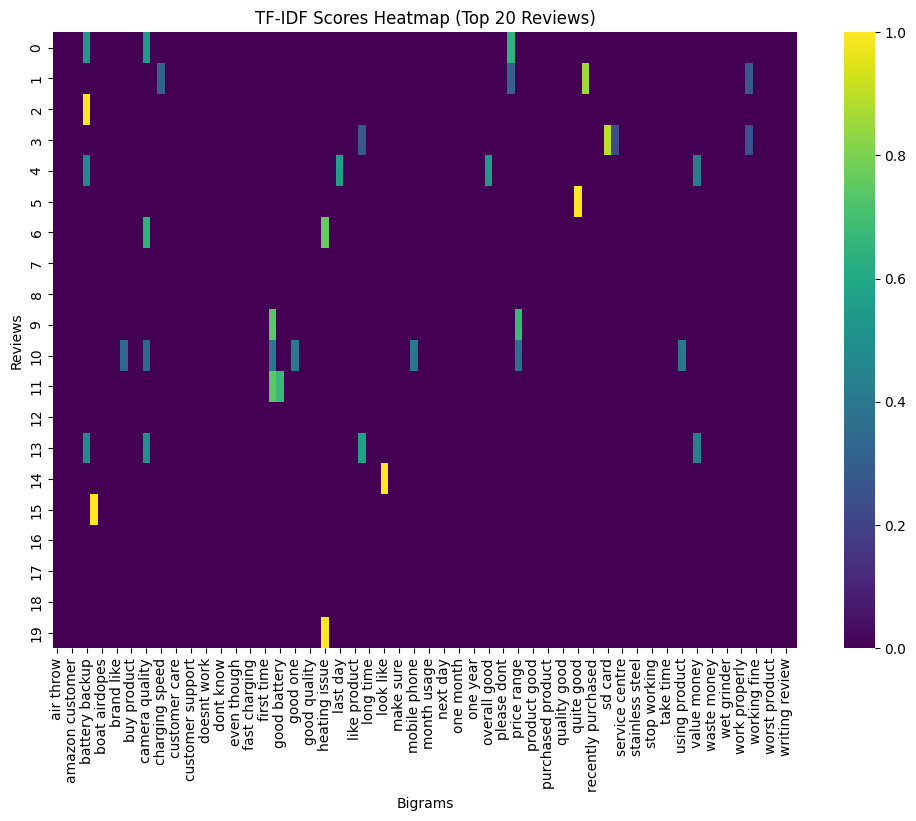

In [54]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_df.head(20), annot=False, cmap='viridis')
plt.title('TF-IDF Scores Heatmap (Top 20 Reviews)')
plt.xlabel('Bigrams')
plt.ylabel('Reviews')
plt.show()

## **Key Observations:**

* Certain bigrams appear frequently across multiple reviews, indicating that they are common themes or topics. These include "good product," "battery life," "customer service," and "product quality."

* Some bigrams are more prominent in specific reviews, suggesting that they are particularly relevant to those individual experiences.

* The color intensity can provide clues about sentiment. Brighter colors might indicate positive sentiment (higher TF-IDF scores), while darker colors could suggest negative sentiment (lower TF-IDF scores).

* The proximity of bigrams in the heatmap can reveal co-occurring terms or phrases. For example, "good product" might frequently appear near "quality good," suggesting a positive association between these terms.

## **Overall Key Themes:**

**Product Quality and Customer Satisfaction:** Throughout the analysis, there was a consistent focus on product quality, performance, and customer satisfaction. This indicates that these factors are crucial for driving positive customer experiences.

**Customer Experience:** Topics related to customer service, issues, and overall satisfaction were frequently discussed, highlighting the importance of providing excellent support.

**Product Features:** Specific product features, such as battery life, charging, sound quality, and design, were often mentioned, suggesting that these are key considerations for customers.

**Brand Perception:** Brands like Daikin, Fireboltt, Boat, LG, Bajaj, Prestige, and Samsung were frequently mentioned, indicating their prominence in the market.

### **Sentiment Analysis:**

**Positive Sentiment:** While there were some negative sentiments expressed, the overall tone of the analysis was positive, suggesting that customers are generally satisfied with the products and services.

**Areas for Improvement:** The identification of negative sentiment and specific issues can help businesses address areas where improvements are needed.